In [4]:
# import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt

In [5]:
database = 'MIMIC.db'

In [6]:
conn = sqlite3.connect(database)

In [9]:
# check different tables available in the database
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,ADMISSIONS,ADMISSIONS,2,"CREATE TABLE ""ADMISSIONS"" (\n""row_id"" INTEGER,..."
1,table,PATIENTS,PATIENTS,10,"CREATE TABLE ""PATIENTS"" (\n""row_id"" INTEGER,\n..."
2,table,ICUSTAYS,ICUSTAYS,14,"CREATE TABLE ""ICUSTAYS"" (\n""row_id"" INTEGER,\n..."


In [12]:
#Retrieve all columns from the 'patients' table
patients = pd.read_sql("""SELECT * FROM patients""", conn) # Assign the result to the variable 'patients'
patients

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1
1,9472,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,None,1
2,9474,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1
3,9478,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,None,2152-09-12 00:00:00,1
4,9479,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1
...,...,...,...,...,...,...,...,...
95,31838,44083,M,2057-11-15 00:00:00,2114-02-20 00:00:00,2114-02-20 00:00:00,2114-02-20 00:00:00,1
96,31853,44154,M,1878-05-14 00:00:00,2178-05-15 00:00:00,2178-05-15 00:00:00,2178-05-15 00:00:00,1
97,31867,44212,F,2078-06-16 00:00:00,2124-01-29 00:00:00,None,2124-01-29 00:00:00,1
98,31870,44222,M,2107-06-27 00:00:00,2182-08-03 00:00:00,2182-08-03 00:00:00,None,1


In [13]:
#Retrieve all columns from the 'admissions' table
admissions = pd.read_sql("""SELECT * FROM admissions;""", conn)
admissions

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,None,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,None,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,None,None,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,None,CATHOLIC,None,UNKNOWN/NOT SPECIFIED,None,None,SEPSIS,1,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,None,CATHOLIC,DIVORCED,WHITE,None,None,ALCOHOLIC HEPATITIS,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,41055,44083,198330,2112-05-28 15:45:00,2112-06-07 16:50:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,ENGL,CATHOLIC,SINGLE,WHITE,2112-05-28 13:16:00,2112-05-28 17:30:00,PERICARDIAL EFFUSION,0,1
125,41070,44154,174245,2178-05-14 20:29:00,2178-05-15 09:45:00,2178-05-15 09:45:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,ENGL,PROTESTANT QUAKER,MARRIED,WHITE,2178-05-14 17:37:00,2178-05-14 22:08:00,ALTERED MENTAL STATUS,1,1
126,41087,44212,163189,2123-11-24 14:14:00,2123-12-30 14:31:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,Medicare,ENGL,UNOBTAINABLE,SINGLE,BLACK/AFRICAN AMERICAN,None,None,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,0,1
127,41090,44222,192189,2180-07-19 06:55:00,2180-07-20 13:00:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,ENGL,CATHOLIC,SINGLE,WHITE,2180-07-19 04:50:00,2180-07-19 08:23:00,BRADYCARDIA,0,1


In [15]:
#Retrieve all columns from the 'icu_stays' table
icu_stays = pd.read_sql("""SELECT * FROM icustays;""", conn)
icu_stays

,row_id,subject_id,hadm_id,icustay_id,dbsource,first_careunit,last_careunit,first_wardid,last_wardid,intime,outtime,los
0,12742,10006,142345,206504,carevue,MICU,MICU,52,52,2164-10-23 21:10:15,2164-10-25 12:21:07,1.6325
1,12747,10011,105331,232110,carevue,MICU,MICU,15,15,2126-08-14 22:34:00,2126-08-28 18:59:00,13.8507
2,12749,10013,165520,264446,carevue,MICU,MICU,15,15,2125-10-04 23:38:00,2125-10-07 15:13:52,2.6499
3,12754,10017,199207,204881,carevue,CCU,CCU,7,7,2149-05-29 18:52:29,2149-05-31 22:19:17,2.1436
4,12755,10019,177759,228977,carevue,MICU,MICU,15,15,2163-05-14 20:43:56,2163-05-16 03:47:04,1.2938
...,...,...,...,...,...,...,...,...,...,...,...,...
131,42676,44083,198330,286428,metavision,CCU,CCU,7,7,2112-05-29 02:01:33,2112-06-01 16:50:40,3.6174
132,42691,44154,174245,217724,metavision,MICU,MICU,50,50,2178-05-14 20:29:55,2178-05-15 11:31:12,0.6259
133,42709,44212,163189,239396,metavision,MICU,MICU,50,50,2123-11-24 14:14:29,2123-12-25 17:12:19,31.1235
134,42712,44222,192189,238186,metavision,CCU,CCU,7,7,2180-07-19 06:56:38,2180-07-20 14:48:45,1.3279


# 1. Basic Patient Demographics Overview

In [18]:
patients_10 = pd.read_sql("""SELECT subject_id, gender, dob FROM patients LIMIT 10;""", conn)
patients_10

,subject_id,gender,dob
0,10006,F,2094-03-05 00:00:00
1,10011,F,2090-06-05 00:00:00
2,10013,F,2038-09-03 00:00:00
3,10017,F,2075-09-21 00:00:00
4,10019,M,2114-06-20 00:00:00
5,10026,F,1895-05-17 00:00:00
6,10027,F,2108-01-15 00:00:00
7,10029,M,2061-04-10 00:00:00
8,10032,M,2050-03-29 00:00:00
9,10033,F,2051-04-21 00:00:00


# 2. Recent Patient Admissions with Demographic and Diagnosis Details

In [83]:
patients_admissions_10 = pd.read_sql("""SELECT p.subject_id, p.gender, a.admittime, a.admission_type, a.diagnosis
                                       FROM patients p
                                       JOIN admissions a ON p.subject_id = a.subject_id
                                       ORDER BY a.admittime DESC
                                       LIMIT 10;""", conn)
patients_admissions_10

,subject_id,gender,admittime,admission_type,diagnosis
0,41976,M,2202-10-03 01:45:00,EMERGENCY,SEPSIS
1,41976,M,2202-09-16 21:56:00,EMERGENCY,SEPSIS
2,41976,M,2202-05-01 22:00:00,EMERGENCY,RESPIRATORY DISTRESS
3,41976,M,2202-02-15 19:01:00,EMERGENCY,UTI/PYELONEPHRITIS
4,41976,M,2201-12-31 19:19:00,EMERGENCY,PNEUMONIA
5,41976,M,2201-11-16 23:00:00,EMERGENCY,SEPSIS; UTI
6,41976,M,2201-09-28 16:47:00,EMERGENCY,SEPSIS
7,41976,M,2201-08-10 23:00:00,EMERGENCY,URINARY TRACT INFECTION;PYELONEPHRITIS
8,41976,M,2201-05-12 10:49:00,EMERGENCY,SEPSIS
9,41976,M,2200-10-29 20:46:00,EMERGENCY,FEVER


# 3.Patient Admission Count by Gender and Ethnicity

In [27]:
patients_demographic = pd.read_sql("""SELECT p.subject_id, a.ethnicity, p.gender, COUNT(a.hadm_id) AS num_admissions
                                     FROM patients p
                                     JOIN admissions a ON p.subject_id = a.subject_id
                                     GROUP BY p.subject_id, a.ethnicity, p.gender
                                     ORDER BY num_admissions DESC;""", conn)
patients_demographic

,subject_id,ethnicity,gender,num_admissions
0,41976,HISPANIC/LATINO - PUERTO RICAN,M,15
1,10088,WHITE,M,3
2,44083,WHITE,M,3
3,10059,WHITE,M,2
4,10094,BLACK/AFRICAN AMERICAN,M,2
...,...,...,...,...
95,43927,WHITE,F,1
96,44154,WHITE,M,1
97,44212,BLACK/AFRICAN AMERICAN,F,1
98,44222,WHITE,M,1


# 4. Recent Admissions with Demographics and Diagnosis

In [46]:
admission_diagnosis = pd.read_sql("""SELECT a.subject_id, a.ethnicity, a.admittime, a.diagnosis
                                     FROM admissions a
                                     JOIN patients p ON a.subject_id = p.subject_id
                                     ORDER BY a.admittime DESC
                                     LIMIT 20;""", conn)
admission_diagnosis

,subject_id,ethnicity,admittime,diagnosis
0,41976,HISPANIC/LATINO - PUERTO RICAN,2202-10-03 01:45:00,SEPSIS
1,41976,HISPANIC/LATINO - PUERTO RICAN,2202-09-16 21:56:00,SEPSIS
2,41976,HISPANIC/LATINO - PUERTO RICAN,2202-05-01 22:00:00,RESPIRATORY DISTRESS
3,41976,HISPANIC/LATINO - PUERTO RICAN,2202-02-15 19:01:00,UTI/PYELONEPHRITIS
4,41976,HISPANIC/LATINO - PUERTO RICAN,2201-12-31 19:19:00,PNEUMONIA
5,41976,HISPANIC/LATINO - PUERTO RICAN,2201-11-16 23:00:00,SEPSIS; UTI
6,41976,HISPANIC/LATINO - PUERTO RICAN,2201-09-28 16:47:00,SEPSIS
7,41976,HISPANIC/LATINO - PUERTO RICAN,2201-08-10 23:00:00,URINARY TRACT INFECTION;PYELONEPHRITIS
8,41976,HISPANIC/LATINO - PUERTO RICAN,2201-05-12 10:49:00,SEPSIS
9,41976,HISPANIC/LATINO - PUERTO RICAN,2200-10-29 20:46:00,FEVER


# 5. Admissions By Insurance Type

In [47]:
admission_insurance = pd.read_sql("""SELECT insurance, COUNT(hadm_id) AS num_admissions
                                     FROM admissions
                                     GROUP BY insurance
                                     ORDER BY num_admissions DESC;""", conn)
admission_insurance

,insurance,num_admissions
0,Medicare,98
1,Private,24
2,Medicaid,6
3,Government,1


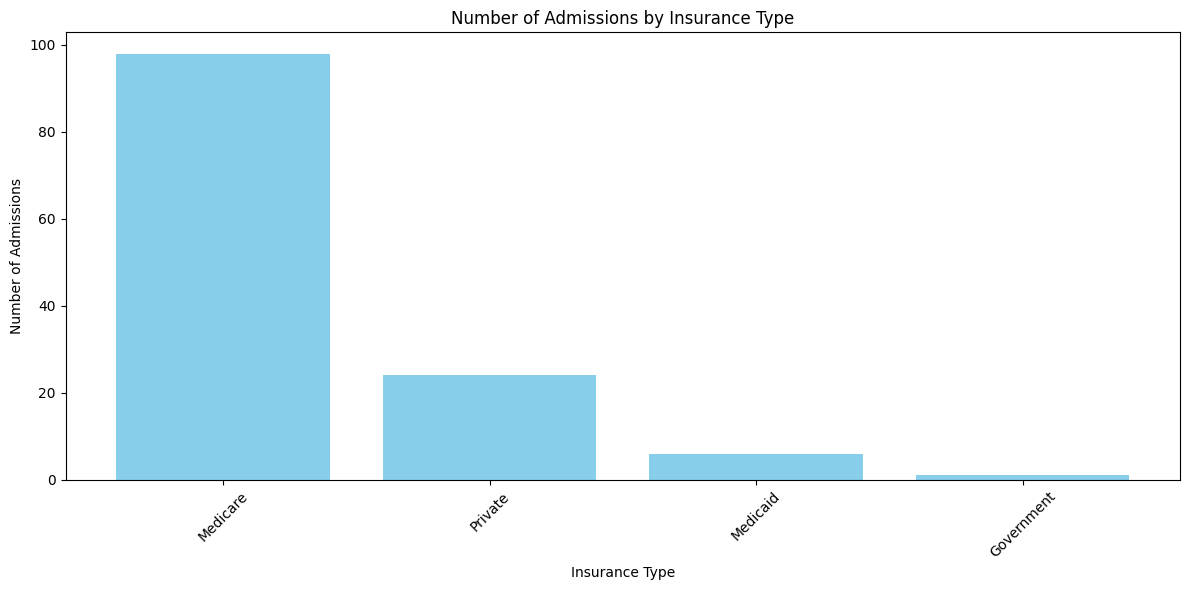

In [82]:
import matplotlib.pyplot as plt

# Assuming 'admission_insurance' is a DataFrame with columns 'insurance' and 'num_admissions'
plt.figure(figsize=(12, 6))
plt.bar(admission_insurance['insurance'], admission_insurance['num_admissions'], color='skyblue')

# Adding titles and labels
plt.xlabel('Insurance Type')
plt.ylabel('Number of Admissions')
plt.title('Number of Admissions by Insurance Type')
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap

# Display the plot
plt.show()


# 6. Ethnicity by Age Group

In [60]:
ethnicity_age = pd.read_sql("""SELECT ethnicity,
       CASE
           WHEN age < 18 THEN 'Under 18'
           WHEN age BETWEEN 18 AND 35 THEN '18-35'
           WHEN age BETWEEN 36 AND 65 THEN '36-65'
           ELSE '65+'
       END AS age_group,
       COUNT(icustay_id) AS icu_stay_count
FROM (
    SELECT icu.icustay_id, a.ethnicity,
           (CAST(strftime('%Y', icu.intime) AS INTEGER) - CAST(strftime('%Y', p.dob) AS INTEGER)) AS age
    FROM icustays icu
    JOIN admissions a ON icu.hadm_id = a.hadm_id
    JOIN patients p ON a.subject_id = p.subject_id
    WHERE icu.intime IS NOT NULL AND p.dob IS NOT NULL  -- Ensuring valid dates
) AS age_data
GROUP BY ethnicity, age_group
ORDER BY icu_stay_count DESC;""", conn)
ethnicity_age

,ethnicity,age_group,icu_stay_count
0,WHITE,65+,71
1,WHITE,36-65,19
2,HISPANIC/LATINO - PUERTO RICAN,36-65,11
3,UNKNOWN/NOT SPECIFIED,65+,7
4,BLACK/AFRICAN AMERICAN,65+,5
5,HISPANIC/LATINO - PUERTO RICAN,65+,4
6,HISPANIC OR LATINO,65+,3
7,UNKNOWN/NOT SPECIFIED,36-65,3
8,AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGN...,36-65,2
9,ASIAN,65+,2


# 7. Insurance Type by Gender

In [72]:
insurance_gender = pd.read_sql("""SELECT insurance, gender, COUNT(hadm_id) AS num_admissions
                                  FROM admissions a
                                  JOIN patients p
                                  ON a.subject_id = p.subject_id
                                  GROUP BY insurance, gender
                                  ORDER BY num_admissions DESC;""", conn)
insurance_gender

,insurance,gender,num_admissions
0,Medicare,M,51
1,Medicare,F,47
2,Private,M,14
3,Private,F,10
4,Medicaid,M,4
5,Medicaid,F,2
6,Government,M,1


# 8. Seasonal Admission By Ethnicity

In [74]:
ethnicity_month_admissions = pd.read_sql("""
SELECT strftime('%m', a.admittime) AS month, a.ethnicity, COUNT(a.hadm_id) AS num_admissions
FROM admissions a
GROUP BY month, a.ethnicity
ORDER BY num_admissions DESC;
""", conn)

ethnicity_month_admissions


,month,ethnicity,num_admissions
0,05,WHITE,12
1,07,WHITE,10
2,08,WHITE,10
3,10,WHITE,8
4,12,WHITE,8
5,01,WHITE,7
6,03,WHITE,7
7,02,WHITE,6
8,09,WHITE,6
9,11,WHITE,6


# 9. Diagnosis Over 65

In [78]:
diagnosis_over_65 = pd.read_sql("""
SELECT a.diagnosis, COUNT(a.hadm_id) AS diagnosis_count
FROM admissions a
JOIN patients p ON a.subject_id = p.subject_id
WHERE (CAST(strftime('%Y', a.admittime) AS INTEGER) - CAST(strftime('%Y', p.dob) AS INTEGER)) > 65
GROUP BY a.diagnosis
ORDER BY diagnosis_count DESC
LIMIT 20;
""", conn)

diagnosis_over_65


,diagnosis,diagnosis_count
0,SEPSIS,7
1,PNEUMONIA,4
2,SHORTNESS OF BREATH,3
3,FEVER,3
4,CONGESTIVE HEART FAILURE,3
5,STROKE/TIA,2
6,RESPIRATORY DISTRESS,2
7,HYPOTENSION,2
8,GASTROINTESTINAL BLEED,2
9,FAILURE TO THRIVE,2


# 10. ICU stay duration by Insurance Type

In [77]:
avg_icu_stay_by_insurance = pd.read_sql("""
SELECT a.insurance, AVG(julianday(icu.outtime) - julianday(icu.intime)) AS avg_stay_length
FROM icustays icu
JOIN admissions a ON icu.hadm_id = a.hadm_id
WHERE icu.outtime IS NOT NULL AND icu.intime IS NOT NULL
GROUP BY a.insurance
ORDER BY avg_stay_length DESC;
""", conn)

avg_icu_stay_by_insurance


,insurance,avg_stay_length
0,Medicaid,8.407324
1,Private,5.893655
2,Medicare,3.930461
3,Government,0.944676


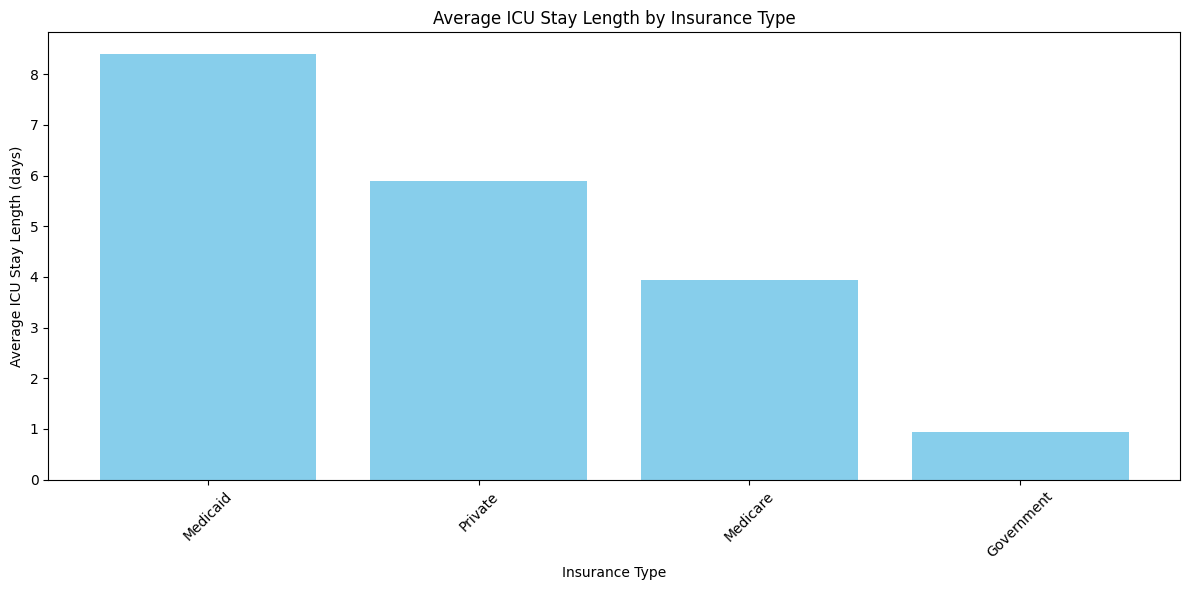

In [79]:
import matplotlib.pyplot as plt

# Assuming avg_icu_stay_by_insurance is already a DataFrame from the query
plt.figure(figsize=(12, 6))
plt.bar(avg_icu_stay_by_insurance['insurance'], avg_icu_stay_by_insurance['avg_stay_length'], color='skyblue')
plt.xlabel('Insurance Type')
plt.ylabel('Average ICU Stay Length (days)')
plt.title('Average ICU Stay Length by Insurance Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
